<a href="https://colab.research.google.com/github/Tong-Zhong/Sentiment_Analysis_with_spacy/blob/main/2008_MSFT_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

掛接雲端硬碟

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#前置作業

In [ ]:
#設定--不顯示python輸出的警告
import warnings #有關python輸出的警告
warnings.filterwarnings("ignore") #不顯示python輸出的警告
#warnings.filterwarnings("always") #顯示python輸出的警告

In [ ]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib as mpl
import matplotlib.pyplot as plt 
from matplotlib.font_manager import fontManager

# 改style要在改font之前
# plt.style.use('seaborn')  

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

--2023-01-02 05:22:20--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 74.125.204.138, 74.125.204.139, 74.125.204.102, ...
Connecting to drive.google.com (drive.google.com)|74.125.204.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/guvb488bo5295a2tklbjhm6932i9ejst/1672636875000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=388ed4bc-d13a-45d9-935b-a1328681c15d [following]
--2023-01-02 05:22:21--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/guvb488bo5295a2tklbjhm6932i9ejst/1672636875000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=388ed4bc-d13a-45d9-935b-a1328681c15d
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 74.125.203.132, 2404:6800:4008:c03::84
Connecting to doc-0k

In [ ]:
!pip install spacytextblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#匯入套件
import numpy as np
import pandas as pd
import spacy
from spacy import displacy
from spacytextblob.spacytextblob import SpacyTextBlob
nlp = spacy.load("en_core_web_sm")
nlp.add_pipe('spacytextblob')

#斷詞、斷句分析

##斷詞

In [ ]:
with open('/content/drive/MyDrive/大數據專題/08年/msft_2008_Q2_20080124發布.txt') as f :
  text = f.readlines()
text = ' '.join(text)
# text

In [ ]:
#將資料print出來 (這邊可跑可不跑)
# doc = nlp(text)
# for token in doc:
#   print(f'{token.i}  {token.text}  {token._.polarity}  {token._.subjectivity}  {spacy.explain(token.pos_)}  {spacy.explain(token.dep_)}  {spacy.explain(token.tag_)}  {token.is_alpha}  {token.is_stop}  {token.is_punct}  {token.like_num}')

#token.i index
#token.text 單字
#token._.polarity 極性
#token._.subjectivity 主觀性
#spacy.explain(token.pos_) 詞性
#spacy.explain(token.dep_) 詞在句子中的定位
#token.is_alpha 是否為全字母
#token.is_stop 是否為停用詞
#token.is_punct 是否為標點符號
#token.like_num 是否為數字

In [ ]:
#建成DataFrame
doc = nlp(text)
cols = ("Word", "Polarity", "Subjectivity","Pos_", "Dep_", "Alpha", "Stopword", "Punct", "Num")
rows = []
for token in doc:    
    row = [token.text, token._.polarity, token._.subjectivity, spacy.explain(token.pos_),   spacy.explain(token.dep_) ,token.is_alpha, token.is_stop, token.is_punct, token.like_num]    
    rows.append(row)
df = pd.DataFrame(rows, columns=cols)
df

,Word,Polarity,Subjectivity,Pos_,Dep_,Alpha,Stopword,Punct,Num
0,Microsoft,0.0,0.0,proper noun,compound,True,False,False,False
1,Corporation,0.0,0.0,proper noun,root,True,False,False,False
2,(,0.0,0.0,punctuation,punctuation,False,False,True,False
3,NASDAQ,0.0,0.0,proper noun,appositional modifier,True,False,False,False
4,:,0.0,0.0,punctuation,punctuation,False,False,True,False
...,...,...,...,...,...,...,...,...,...
9694,line,0.0,0.0,noun,direct object,True,False,False,False
9695,at,0.0,0.0,adposition,prepositional modifier,True,True,False,False
9696,this,0.0,0.0,determiner,determiner,True,True,False,False
9697,time,0.0,0.0,noun,object of preposition,True,False,False,False


In [ ]:
#查看資料
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9699 entries, 0 to 9698
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Word          9699 non-null   object 
 1   Polarity      9699 non-null   float64
 2   Subjectivity  9699 non-null   float64
 3   Pos_          9699 non-null   object 
 4   Dep_          9696 non-null   object 
 5   Alpha         9699 non-null   bool   
 6   Stopword      9699 non-null   bool   
 7   Punct         9699 non-null   bool   
 8   Num           9699 non-null   bool   
dtypes: bool(4), float64(2), object(3)
memory usage: 416.9+ KB


In [ ]:
# 將stopword、punct、num=True，以及Alpha=False的字刪除
df.drop(df[(df.Alpha == False)|(df.Stopword == True)|(df.Punct == True)|(df.Num == True)].index , inplace=True)
df

,Word,Polarity,Subjectivity,Pos_,Dep_,Alpha,Stopword,Punct,Num
0,Microsoft,0.0,0.0,proper noun,compound,True,False,False,False
1,Corporation,0.0,0.0,proper noun,root,True,False,False,False
3,NASDAQ,0.0,0.0,proper noun,appositional modifier,True,False,False,False
5,MSFT,0.0,0.0,proper noun,appositional modifier,True,False,False,False
8,Earnings,0.0,0.0,noun,compound,True,False,False,False
...,...,...,...,...,...,...,...,...,...
9686,concludes,0.0,0.0,verb,relative clause modifier,True,False,False,False
9687,today,0.0,0.0,noun,modifier of nominal,True,False,False,False
9692,disconnect,0.0,0.0,verb,root,True,False,False,False
9694,line,0.0,0.0,noun,direct object,True,False,False,False


**Pos_被刪除的詞性涵義：**
* proper noun(專有名詞)
* adposition(同位語on, in, for, towards)
* auxiliary(助動詞 is、will do)
* coordinating conjunction(並列連詞for、and)
* numeral(數字)
* pronoun(代詞)
* subordinating conjunction(從屬連詞because、when)

In [ ]:
#將'Pos_'的'proper noun','adposition' ,'auxiliary', 'coordinating conjunction', 'numeral', 'pronoun', 'subordinating conjunction'刪除
df.drop(df[df['Pos_'].isin(['proper noun','adposition' ,'auxiliary', 'coordinating conjunction', 'numeral', 'pronoun', 'subordinating conjunction'])].index , inplace=True)
df

,Word,Polarity,Subjectivity,Pos_,Dep_,Alpha,Stopword,Punct,Num
8,Earnings,0.0,0.0,noun,compound,True,False,False,False
15,PM,0.0,0.0,noun,appositional modifier,True,False,False,False
67,SecuritiesOperatorWelcome,0.0,0.0,verb,root,True,False,False,False
72,quarter,0.0,0.0,noun,compound,True,False,False,False
73,earnings,0.0,0.0,noun,compound,True,False,False,False
...,...,...,...,...,...,...,...,...,...
9686,concludes,0.0,0.0,verb,relative clause modifier,True,False,False,False
9687,today,0.0,0.0,noun,modifier of nominal,True,False,False,False
9692,disconnect,0.0,0.0,verb,root,True,False,False,False
9694,line,0.0,0.0,noun,direct object,True,False,False,False


In [ ]:
#將Dep_的'auxiliary (passive)', 'coordinating conjunction', 'clausal subject', 'complement of preposition', 'compound', 'conjunct', 'nominal subject',
#'open clausal complement','punctuation','modifier of quantifier'刪除
df.drop(df[df['Dep_'].isin(['auxiliary (passive)', 'coordinating conjunction', 'clausal subject', 'complement of preposition', 'compound', 'conjunct', 'nominal subject',
'open clausal complement', 'punctuation','modifier of quantifier', 'object of preposition', 'attribute',  'modifier of nominal', 'prepositional modifier', 'appositional modifier', 
'possession modifier', 'nominal subject (passive)', 'punctuation', 'dative', 'numeric modifier' ])].index , inplace=True)
df

,Word,Polarity,Subjectivity,Pos_,Dep_,Alpha,Stopword,Punct,Num
67,SecuritiesOperatorWelcome,0.0,0.0,verb,root,True,False,False,False
93,session,0.0,0.0,noun,direct object,True,False,False,False
97,star,0.0,0.0,noun,direct object,True,False,False,False
109,recorded,0.0,0.0,verb,root,True,False,False,False
115,objections,0.0,0.0,noun,direct object,True,False,False,False
...,...,...,...,...,...,...,...,...,...
9677,Thanks,0.2,0.2,noun,root,True,False,False,False
9682,today,0.0,0.0,noun,noun phrase as adverbial modifier,True,False,False,False
9686,concludes,0.0,0.0,verb,relative clause modifier,True,False,False,False
9692,disconnect,0.0,0.0,verb,root,True,False,False,False


In [ ]:
#將'Pos_'&'Dep_'共同條件的['coordinating conjunction', 'coordinating conjunction'] ,['noun', 'direct object'] ,['verb', 'direct object'] ,['noun','adverbial clause modifier'] 
#['verb', 'adverbial clause modifier'],['verb' ,'clausal complement'] ,['noun' ,'clausal complement'] ,['verb', 'relative clause modifier'] ,['noun', 'noun phrase as adverbial modifier'],
#['verb', 'clausal subject'] ,['interjection', 'interjection'] ,['verb','root'] ,['noun','root'] 刪除
df.drop(df[(df.Pos_ == 'coordinating conjunction') & (df.Dep_ == 'coordinating conjunction') | (df.Pos_ == 'noun') & (df.Dep_ == 'direct object') | 
(df.Pos_ == 'verb') & (df.Dep_ == 'direct object') | (df.Pos_ == 'noun') & (df.Dep_ == 'adverbial clause modifier') |
(df.Pos_ == 'verb') & (df.Dep_ == 'adverbial clause modifier') | (df.Pos_ == 'verb') & (df.Dep_ == 'clausal complement') |
(df.Pos_ == 'noun') & (df.Dep_ == 'clausal complement') | (df.Pos_ == 'verb') & (df.Dep_ == 'relative clause modifier')|
(df.Pos_ == 'noun') & (df.Dep_ == 'noun phrase as adverbial modifier') | (df.Pos_ == 'verb') & (df.Dep_ == 'clausal subject')|
(df.Pos_ == 'interjection') & (df.Dep_ == 'interjection') | (df.Pos_ == 'verb') & (df.Dep_ == 'root') | (df.Pos_ == 'noun') & (df.Dep_ == 'root') ].index , inplace=True)
df

,Word,Polarity,Subjectivity,Pos_,Dep_,Alpha,Stopword,Punct,Num
136,general,0.05,0.5,adjective,adjectival modifier,True,False,False,False
145,good,0.70,0.6,adjective,adjectival modifier,True,False,False,False
175,Corporate,0.00,0.0,adjective,adjectival modifier,True,False,False,False
199,key,0.00,1.0,adjective,adjectival modifier,True,False,False,False
206,fiscal,0.00,0.0,adjective,adjectival modifier,True,False,False,False
...,...,...,...,...,...,...,...,...,...
9591,free,0.40,0.8,adjective,adjectival complement,True,False,False,False
9598,directly,0.10,0.4,adverb,adverbial modifier,True,False,False,False
9615,available,0.40,0.4,adjective,adjectival complement,True,False,False,False
9651,international,0.00,0.0,adjective,adjectival modifier,True,False,False,False


In [ ]:
#查看'Polarity'描述
df['Polarity'].describe()

count    753.000000
mean       0.098867
std        0.239939
min       -0.500000
25%        0.000000
50%        0.000000
75%        0.160000
max        1.000000
Name: Polarity, dtype: float64

In [ ]:
#查看'Subjectivity'描述
df['Subjectivity'].describe()

count    753.000000
mean       0.274590
std        0.324696
min        0.000000
25%        0.000000
50%        0.100000
75%        0.500000
max        1.000000
Name: Subjectivity, dtype: float64

In [ ]:
#為'Polarity'定義'Positive'、'Neutral'、'Negative'，放在'Sentiment'欄位
def getSentiment(score):
  if score > 0:
    return 'Positive'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Negative'
df['Sentiment'] = df['Polarity'].apply(getSentiment)

In [ ]:
#為'Subjectivity'定義'Subjective'、'Objective',放在'Opinion'欄位
def getOpinion(_score):
  if _score > 0:
    return 'Subjective'
  elif _score == 0:
    return 'Objective'
df['Opinion'] = df['Subjectivity'].apply(getOpinion)

In [ ]:
#查看資料表
df

,Word,Polarity,Subjectivity,Pos_,Dep_,Alpha,Stopword,Punct,Num,Sentiment,Opinion
136,general,0.05,0.5,adjective,adjectival modifier,True,False,False,False,Positive,Subjective
145,good,0.70,0.6,adjective,adjectival modifier,True,False,False,False,Positive,Subjective
175,Corporate,0.00,0.0,adjective,adjectival modifier,True,False,False,False,Neutral,Objective
199,key,0.00,1.0,adjective,adjectival modifier,True,False,False,False,Neutral,Subjective
206,fiscal,0.00,0.0,adjective,adjectival modifier,True,False,False,False,Neutral,Objective
...,...,...,...,...,...,...,...,...,...,...,...
9591,free,0.40,0.8,adjective,adjectival complement,True,False,False,False,Positive,Subjective
9598,directly,0.10,0.4,adverb,adverbial modifier,True,False,False,False,Positive,Subjective
9615,available,0.40,0.4,adjective,adjectival complement,True,False,False,False,Positive,Subjective
9651,international,0.00,0.0,adjective,adjectival modifier,True,False,False,False,Neutral,Objective


In [ ]:
#將"Sentiment"與"Opinion"做為一群，看總數
total_count = df.groupby(["Sentiment", "Opinion"]).size().reset_index(name="總數")
total_count

,Sentiment,Opinion,總數
0,Negative,Subjective,68
1,Neutral,Objective,369
2,Neutral,Subjective,78
3,Positive,Subjective,238


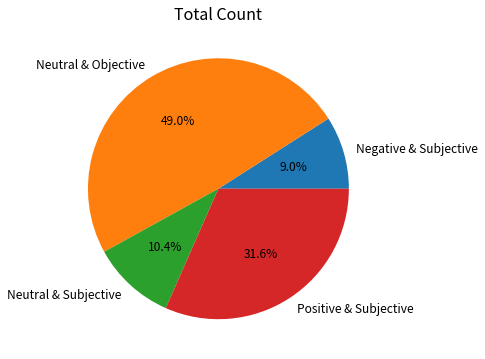

In [ ]:
#將資料畫成圓餅圖查看
import matplotlib.pyplot as plt
size = total_count["總數"].values
label = ["Negative & Subjective", "Neutral & Objective", "Neutral & Subjective", "Positive & Subjective"]
plt.figure(figsize=(20,6))
plt.pie(size,                           # 數值
        labels = label,                # 標籤
        autopct = "%1.1f%%",            # 將數值百分比並留到小數點一位
        pctdistance = 0.6,              # 數字距圓心的距離
        textprops = {"fontsize" : 12},  # 文字大小
        shadow=False) 
plt.title("Total Count",fontsize = 16)
plt.show()

**AAPL_Q1 斷詞分析由 Neutral & Objective占多數**

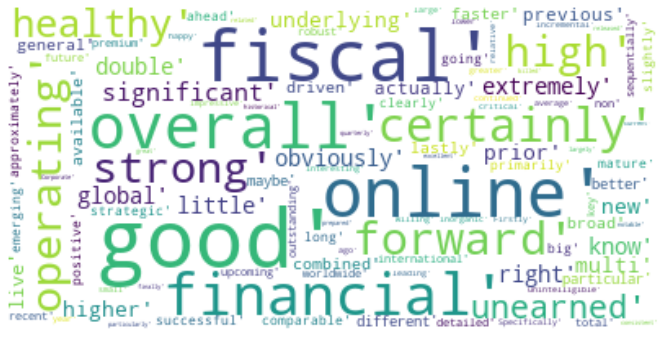

In [ ]:
#文字雲
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
# Create and generate a word cloud image:
kl = df["Word"].values
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(str(kl))
plt.figure(figsize=(20,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

##斷句

In [ ]:
#看polarity、subjectivity、assessments(可跑可不跑)
# ※assessments 後面DataFrame沒有

# _aapl_2021q1_path = '/content/drive/MyDrive/大數據專題/畢專/aapl_2021_01_27_Q1.txt'
# _aapl_2021q1_readfile = open(_aapl_2021q1_path).read()
# text = _aapl_2021q1_readfile
# doc = nlp(text)
# for sentence in doc.sents:
#   sentence_list.append(sentence)
#   print('句子',f'{sentence.text}  {sentence._.polarity}  {sentence._.subjectivity}'
#   ,'\n','依據',sentence._.blob.sentiment_assessments.assessments)

# doc._.polarity                          
# doc._.subjectivity                      
# doc._.blob.sentiment_assessments.assessments   # Assessments:評估polarity、subjectivity 的依據列表 
# doc._.blob.ngrams()  #計算字的出現頻率

In [ ]:
#建成DataFrame
# with open('/content/drive/MyDrive/大數據專題/畢專/aapl_2021_01_27_Q1.txt') as f :
#   text = f.read()
  
doc = nlp(text)

_cols = ("Sentence", "Polarity", "Subjectivity")
_rows = []
for _token in doc.sents:    
    _row = [_token.text, _token._.polarity, _token._.subjectivity] #_token._.blob.sentiment_assessments.assessments 
    _rows.append(_row)
_df = pd.DataFrame(_rows, columns=_cols)
_df

,Sentence,Polarity,Subjectivity
0,Microsoft Corporation (NASDAQ:MSFT),0.000000,0.000000
1,"F2Q08 Earnings Call January 24, 2008 5:30 PM E...",0.025000,0.250000
2,At this time all participants are in a listen ...,0.000000,1.000000
3,"During the question and answer session, please...",0.000000,0.000000
4,Today’s call is being recorded.,0.000000,0.000000
...,...,...,...
348,"If you have any further questions, please feel...",0.166667,0.566667
349,"As I mentioned at the beginning of this call, ...",0.400000,0.400000
350,"In addition, you can hear the replay by dialin...",0.200000,0.200000
351,Thanks again for joining us today.,0.200000,0.200000


In [ ]:
#查看'Polarity'描述
_df['Polarity'].describe()

count    353.000000
mean       0.115034
std        0.207438
min       -0.483333
25%        0.000000
50%        0.027778
75%        0.200000
max        1.000000
Name: Polarity, dtype: float64

In [ ]:
#查看'Subjectivity'描述
_df['Subjectivity'].describe()

count    353.000000
mean       0.301767
std        0.248143
min        0.000000
25%        0.033333
50%        0.300000
75%        0.500000
max        1.000000
Name: Subjectivity, dtype: float64

In [ ]:
#為'Polarity'定義'Positive'、'Neutral'、'Negative'，放在'Sentiment'欄位
def getSentiment(score):
  if score > 0:
    return 'Positive'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Negative'
_df['Sentiment'] = _df['Polarity'].apply(getSentiment)

In [ ]:
#為'Subjectivity'定義'Subjective'、'Objective'放在'Opinion'欄位
def getOpinion(_score):
  if _score > 0:
    return 'Subjective'
  elif _score == 0:
    return 'Objective'
_df['Opinion'] = _df['Subjectivity'].apply(getOpinion)

In [ ]:
#查看資料表
_df

,Sentence,Polarity,Subjectivity,Sentiment,Opinion
0,Microsoft Corporation (NASDAQ:MSFT),0.000000,0.000000,Neutral,Objective
1,"F2Q08 Earnings Call January 24, 2008 5:30 PM E...",0.025000,0.250000,Positive,Subjective
2,At this time all participants are in a listen ...,0.000000,1.000000,Neutral,Subjective
3,"During the question and answer session, please...",0.000000,0.000000,Neutral,Objective
4,Today’s call is being recorded.,0.000000,0.000000,Neutral,Objective
...,...,...,...,...,...
348,"If you have any further questions, please feel...",0.166667,0.566667,Positive,Subjective
349,"As I mentioned at the beginning of this call, ...",0.400000,0.400000,Positive,Subjective
350,"In addition, you can hear the replay by dialin...",0.200000,0.200000,Positive,Subjective
351,Thanks again for joining us today.,0.200000,0.200000,Positive,Subjective


In [ ]:
#將"Sentiment"與"Opinion"做為一群，看總數
_total_count = _df.groupby(["Sentiment", "Opinion"]).size().reset_index(name="總數")
_total_count

,Sentiment,Opinion,總數
0,Negative,Subjective,43
1,Neutral,Objective,85
2,Neutral,Subjective,35
3,Positive,Objective,1
4,Positive,Subjective,189


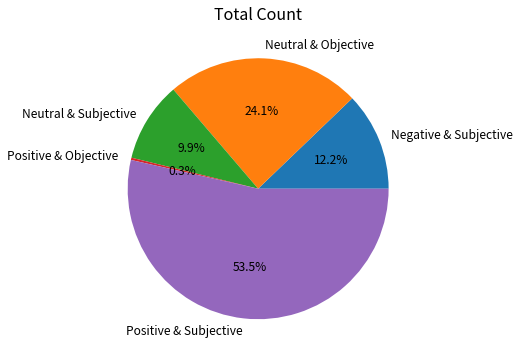

In [ ]:
#將資料畫成圓餅圖查看
import matplotlib.pyplot as plt
_size = _total_count["總數"].values
label = ["Negative & Subjective", "Neutral & Objective", "Neutral & Subjective", "Positive & Objective", "Positive & Subjective"]
plt.figure(figsize=(20,6)) 
plt.pie(_size,                           # 數值
        labels = label,                # 標籤
        autopct = "%1.1f%%",            # 將數值百分比並留到小數點一位
        pctdistance = 0.6,              # 數字距圓心的距離
        textprops = {"fontsize" : 12},  # 文字大小
        shadow=False) 
plt.title("Total Count",fontsize = 16)
plt.show()

**AAPL_Q1 斷句分析由 Positive & Subjective占多數**

#查看句子

In [ ]:
#查看'Negative','Subjective'的句子
neg_sub_j=1
sorted = _df.sort_values(by=['Polarity','Subjectivity'],ascending=False)
for i in range(0, sorted.shape[0]):
  if(sorted['Sentiment'][i] == 'Negative') & (sorted['Opinion'][i] == 'Subjective'):
    print(str(neg_sub_j)+ ')' + sorted['Sentence'][i])
    print()
    neg_sub_j+=1

In [ ]:
#查看'Neutral','Objective'的句子
neu_ob_j=1
sorted = _df.sort_values(by=['Polarity','Subjectivity'],ascending=False)
for i in range(0, sorted.shape[0]):
  if(sorted['Sentiment'][i] == 'Neutral') & (sorted['Opinion'][i] == 'Objective'):
    print(str(neu_ob_j)+ ')' + sorted['Sentence'][i])
    print()
    neu_ob_j+=1

In [ ]:
#查看'Neutral','Subjective'的句子
neu_sub_j=1
sorted = _df.sort_values(by=['Polarity','Subjectivity'],ascending=False)
for i in range(0, sorted.shape[0]):
  if(sorted['Sentiment'][i] == 'Neutral') & (sorted['Opinion'][i] == 'Subjective'):
    print(str(neu_sub_j)+ ')' + sorted['Sentence'][i])
    print()
    neu_sub_j+=1

In [ ]:
#查看'Positive','Subjective'的句子
pos_sub_j=1
sorted = _df.sort_values(by=['Polarity','Subjectivity'],ascending=False)
for i in range(0, sorted.shape[0]):
  if(sorted['Sentiment'][i] == 'Positive') & (sorted['Opinion'][i] == 'Subjective'):
    print(str(pos_sub_j)+ ')' + sorted['Sentence'][i])
    print()
    pos_sub_j+=1

#結果


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

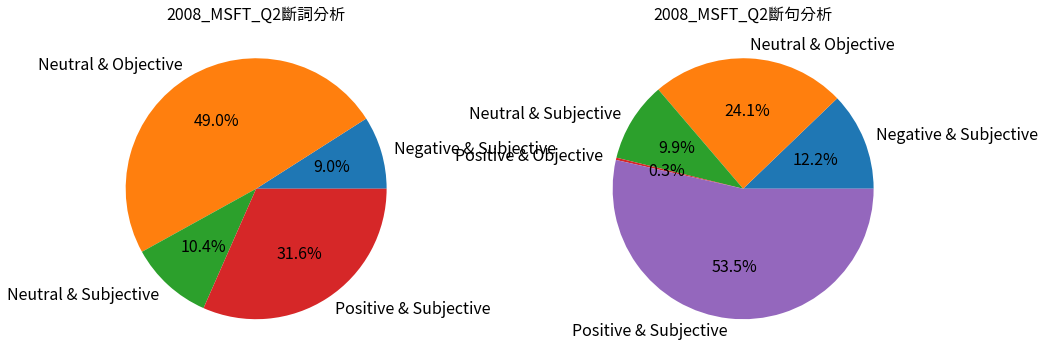

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16,6))
size = total_count["總數"].values
_size = _total_count["總數"].values
label1 = ["Negative & Subjective", "Neutral & Objective", "Neutral & Subjective", "Positive & Subjective"]
label2 = ["Negative & Subjective", "Neutral & Objective", "Neutral & Subjective", "Positive & Objective", "Positive & Subjective"]


axs[0].pie(size, labels=label1, autopct='%1.1f%%', pctdistance = 0.6,              # 數字距圓心的距離
        textprops = {"fontsize" : 16} )
axs[0].set_title('2008_MSFT_Q2斷詞分析', fontsize=16)


axs[1].pie(_size, labels=label2, autopct='%1.1f%%', pctdistance = 0.6,              # 數字距圓心的距離
        textprops = {"fontsize" : 16})
axs[1].set_title('2008_MSFT_Q2斷句分析', fontsize=16)


plt.savefig("2008_MSFT_Q2.png")
from google.colab import files
files.download("2008_MSFT_Q2.png")

#HTML

In [ ]:
#%%shell
#jupyter nbconvert --to html '剛複製的路徑'

%%shell
jupyter nbconvert --to html '/content/drive/MyDrive/大數據專題/大數據/專題12 26進度.ipynb'

[NbConvertApp] Converting notebook /content/drive/MyDrive/大數據專題/大數據/專題12 26進度.ipynb to html
[NbConvertApp] Writing 619650 bytes to /content/drive/MyDrive/大數據專題/大數據/專題12 26進度.html
